# PyBer Analysis

## Importing the csv files

In [1]:
%matplotlib inline

# Dependencies

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)        # to supress pandas Future Warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)   # to supress matplotlib deprecation warnings


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os
import csv
from matplotlib.ticker import MultipleLocator

# importing the Datasets

city_data_df = pd.read_csv(os.path.join("Resources", "city_data.csv"))
ride_data_df = pd.read_csv(os.path.join("Resources", "ride_data.csv"))

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


## Inspecting the DataFrames

In [4]:
# Inspecting the city DataFrame

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Inspecting the ride DataFrame

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merging the DataFrames

In [10]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = "city")

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Creating DataFrames for each type of city

In [11]:
# How many types of cities do we have?

pyber_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

pyber_data_df.count() == urban_cities_df.count() + suburban_cities_df.count() + rural_cities_df.count() # Check

city            True
date            True
fare            True
ride_id         True
driver_count    True
type            True
dtype: bool

## Getting the number of rides per each city type

In [13]:
# urban cities

urban_rides_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_rides_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# suburban cities

suburban_rides_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_rides_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [15]:
# rural cities

rural_rides_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_rides_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## Getting the Average Fare for each city type

In [16]:
# urban cities

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [17]:
# suburban cities

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [18]:
# rural cities

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Getting the Average Number Of Drivers for each city type

In [19]:
# urban cities

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [20]:
# suburban cities

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [21]:
# rural cities

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Creating individual bubble charts

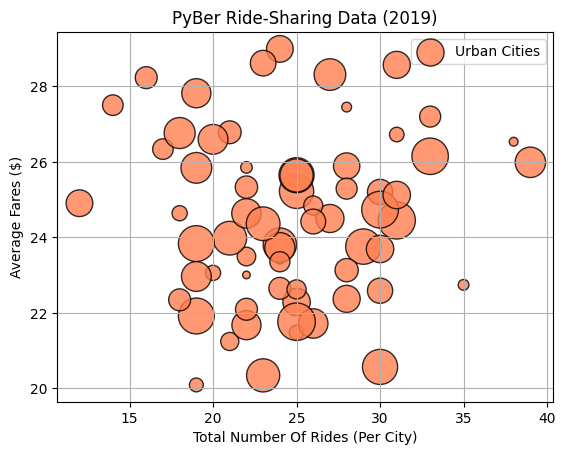

In [22]:
# urban cities

plt.scatter(urban_rides_count, urban_avg_fare, s = 10 * urban_driver_count, label = "Urban Cities",
           color = "coral", edgecolor = "black", linewidth = 1, alpha = 0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.legend()
plt.grid()
plt.show()

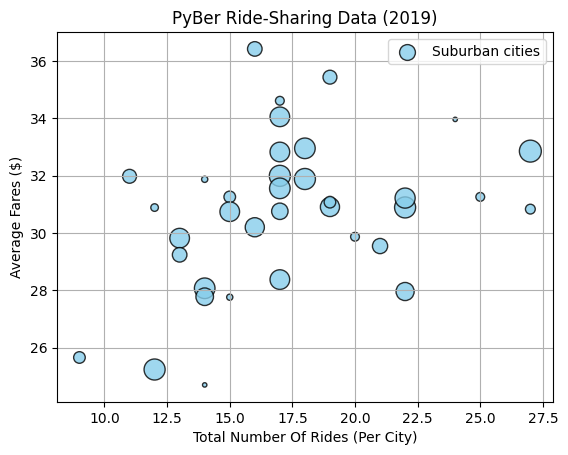

In [23]:
# suburban cities

plt.scatter(suburban_rides_count, suburban_avg_fare, s = 10 * suburban_driver_count, color = "skyblue",
           linewidth = 1, edgecolors = "black", alpha = 0.8, label = "Suburban cities")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.legend()
plt.grid()
plt.show()

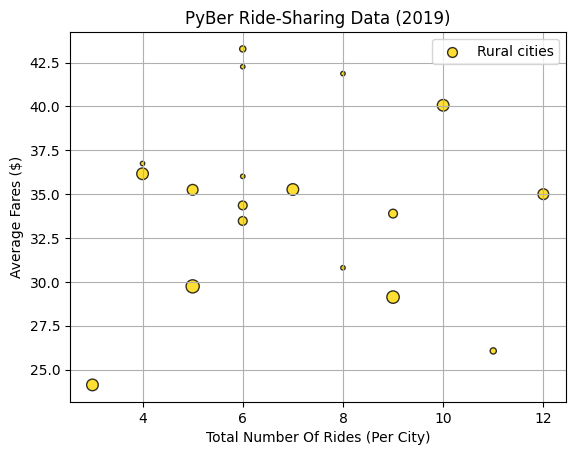

In [24]:
# rural cities 

plt.scatter(rural_rides_count, rural_avg_fare, s = 10 * rural_driver_count, color = "gold", edgecolors = "black",
           linewidth = 1, alpha = 0.8, label = "Rural cities")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fares ($)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.grid()
plt.legend()
plt.show()

## Creating a combined bubble chart

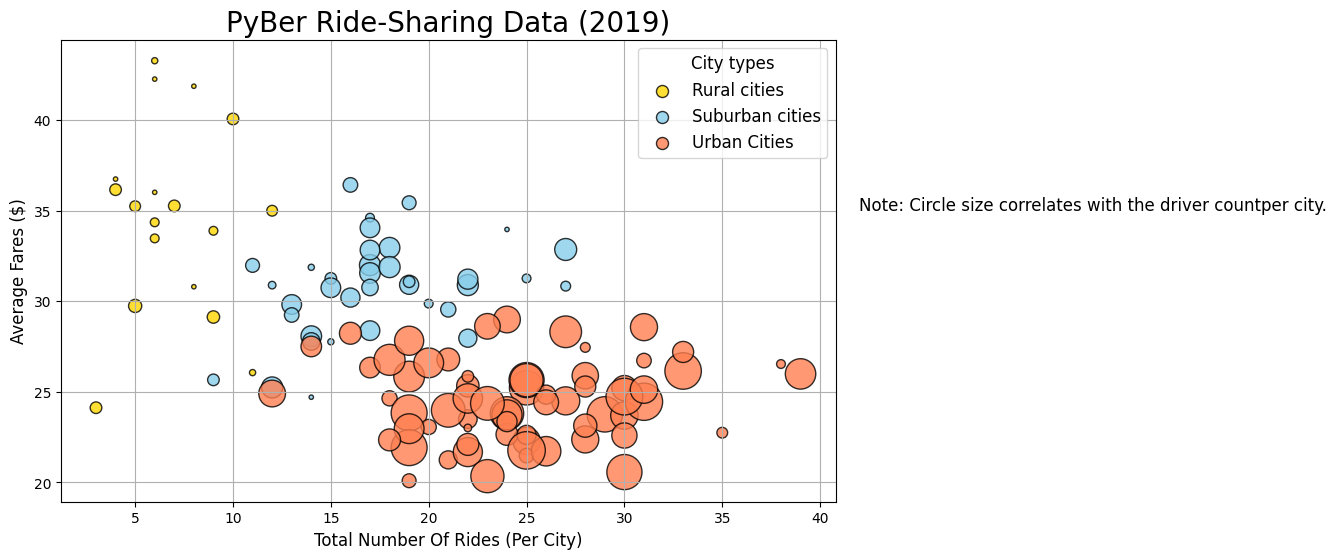

In [25]:
plt.subplots(figsize = (10, 6))

# plotting

plt.scatter(rural_rides_count, rural_avg_fare, s = 10 * rural_driver_count, color = "gold", edgecolors = "black",
           linewidth = 1, alpha = 0.8, label = "Rural cities")
plt.scatter(suburban_rides_count, suburban_avg_fare, s = 10 * suburban_driver_count, color = "skyblue",
           linewidth = 1, edgecolors = "black", alpha = 0.8, label = "Suburban cities")
plt.scatter(urban_rides_count, urban_avg_fare, s = 10 * urban_driver_count, label = "Urban Cities",
           color = "coral", edgecolor = "black", linewidth = 1, alpha = 0.8)

# adding the title and the labels

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fares ($)", fontsize = 12)
plt.xlabel("Total Number Of Rides (Per City)", fontsize = 12)

# adding the grid

plt.grid()

# Fixing the legend

lgnd = plt.legend(fontsize = 12, mode = "Expanded", scatterpoints = 1, loc = "best", title = "City types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Inlude a text label about circle size

plt.text(42, 35, "Note: Circle size correlates with the driver countper city.", fontsize = 12)

# saving the figure

figure_name = "Fig 1.png"
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")

# showing the plot

plt.show()



# Summary Statistics

## Summary statistics for number of rides per city type

In [26]:
# Describe urban cities DataFrame

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [27]:
# Describing suburban cities DataFrame

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [28]:
# Describing rural cities DataFrame

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [29]:
urban_rides_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
# Calculating the mean 

round(urban_rides_count.mean(),2) , round(suburban_rides_count.mean(),2), round(rural_rides_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculating the median

round(urban_rides_count.median(),2), round(suburban_rides_count.median(),2), round(suburban_rides_count.median(),2)

(24.0, 17.0, 17.0)

In [32]:
# Calculating the mode

round(urban_rides_count.mode(),2), round(suburban_rides_count.mode(),2), round(rural_rides_count.mode(),2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities. 

import numpy as np
import scipy.stats as sts


mean_urban_ride_count = np.mean(urban_rides_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_rides_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_rides_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


## Summary Statistics for the Fare by city type

In [34]:
# urban city fares

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [35]:
# measure the central tendency of the average fare for the urban cities

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# measure the central tendency of the average fare for the suburban cities

suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The average fare price for suburban cities is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban cities is ${median_urban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban cities is ${mode_suburban_fares}.")

The average fare price for suburban cities is $30.97.
The median fare price for suburban cities is $24.64.
The mode fare price for suburban cities is $ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# measure the central tendency of the average fare for the rural cities

rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f"The mean fare price for rural cities is ${mean_rural_fares:.2f}.\n"
     f"The median fare price for rural cities is ${median_rural_fares:.2f}.\n"
     f"The mode fare price for the rural cities is ${mode_rural_fares}.")

The mean fare price for rural cities is $34.62.
The median fare price for rural cities is $37.05.
The mode fare price for the rural cities is $ModeResult(mode=array([37.05]), count=array([2])).


## Summary Statistics for Number Of Drivers by city type

In [38]:
# measure the central tendency of the average number of city drivers for the urban cities

urban_drivers = urban_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f"The average number of drivers in urban cities is {mean_urban_drivers:.2f}.\n"
     f"The median of number of drivers in urban cities is {median_urban_drivers:.2f}.\n"
     f"the mode of number of drivers in urban cities is {mode_urban_drivers}.")

The average number of drivers in urban cities is 36.68.
The median of number of drivers in urban cities is 37.00.
the mode of number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).


In [39]:
# measure the central tendency of the average number of city drivers for the suburban cities

suburban_drivers = suburban_cities_df["driver_count"]

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f"The avergae number of drivers in suburban cities is {mean_suburban_drivers:.2f}.\n"
     f"The median number of drivers in suburban cities is {median_suburban_drivers:.2f}.\n"
     f"The mode number of drivers in suburban cities is {mode_suburban_drivers}.\n")

The avergae number of drivers in suburban cities is 13.71.
The median number of drivers in suburban cities is 16.00.
The mode number of drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).



In [40]:
# measure the central tendency of the average number of city drivers for the rural cities

rural_drivers = rural_cities_df["driver_count"]

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers =  sts.mode(rural_drivers)

print(f"The average number of drivers in rural cities is {mean_rural_drivers:.2f}.\n"
     f"The median number of drivers in rural cities is {median_urban_drivers:.2f}.\n"
     f"The mode number of drivers in rural cities is {mode_rural_drivers}.")

The average number of drivers in rural cities is 4.30.
The median number of drivers in rural cities is 37.00.
The mode number of drivers in rural cities is ModeResult(mode=array([1]), count=array([32])).


## Creating a box plot

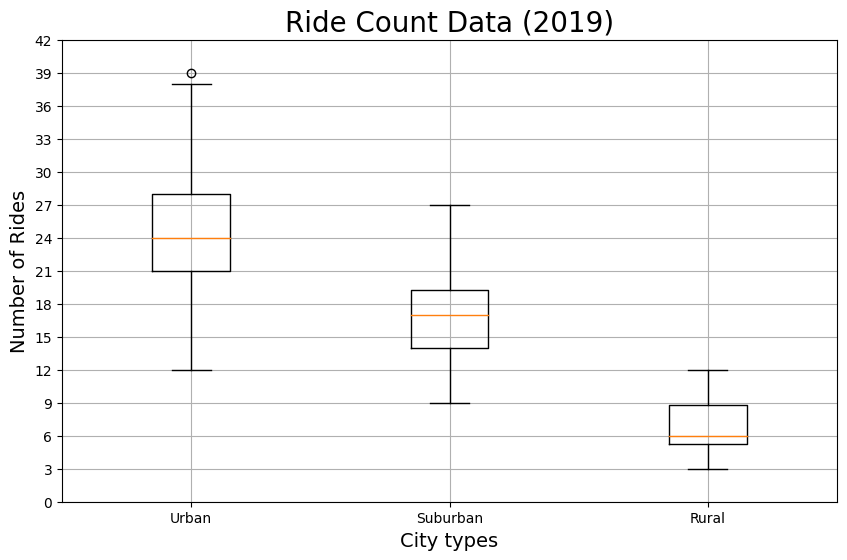

In [41]:
# Creating a box plot for the ride counts per city type

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_rides_count, suburban_rides_count, rural_rides_count]

figure_name = "Fig 2.png"

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title('Ride Count Data (2019)', fontsize =20) 
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel("City types", fontsize = 14)
ax.set_yticks(np.arange(0, 45, step=3.0)) 
ax.grid()
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")
plt.show()

In [42]:
# Getting the Outlier

urban_city_outlier = urban_rides_count[urban_rides_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


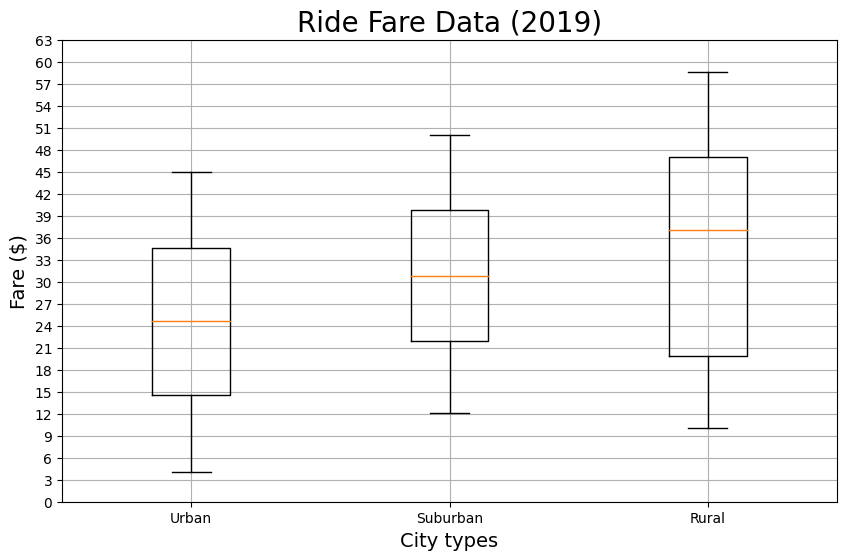

In [43]:
# Creating a box plot for the ride fare data

x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

figure_name = "Fig 3.png"

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_fare_data, labels = x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($)", fontsize = 14)
ax.set_xlabel("City types", fontsize = 14)
ax.set_yticks(np.arange(0,65,step = 3))
ax.grid()
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")
plt.show()

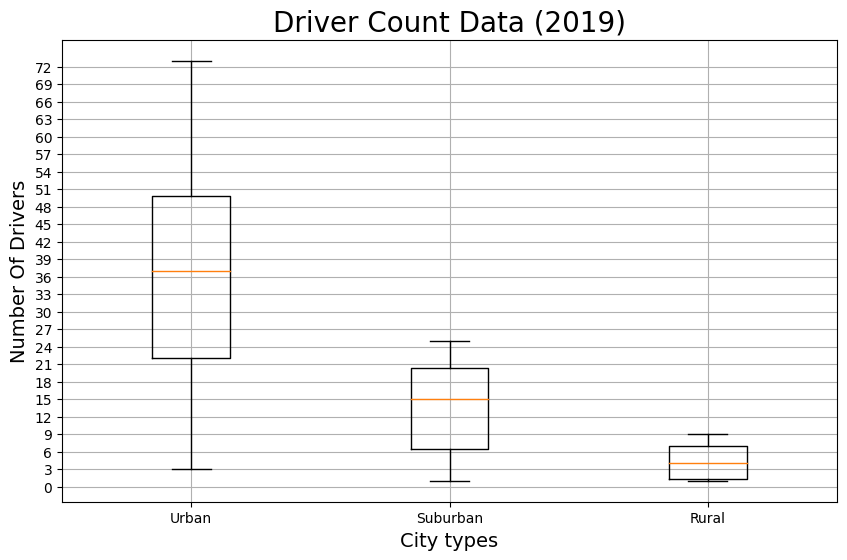

In [44]:
# Creating a box plot for the driver count

x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

figure_name = "Fig 4.png"

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(driver_count_data, labels = x_labels)
ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number Of Drivers", fontsize = 14)
ax.set_xlabel("City types", fontsize = 14)
ax.set_yticks(np.arange(0,75,step = 3))
ax.grid()
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")
plt.show()

## Creating Pie charts

In [48]:
# calculating percentages of fares per each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [51]:
# Getting the sum of all the fares

total_fares = sum_fares_by_type.sum()
total_fares

63538.64

In [75]:
# calculate the percentage of fare for each city type

type_percents = 100 * sum_fares_by_type/total_fares
type_pecents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

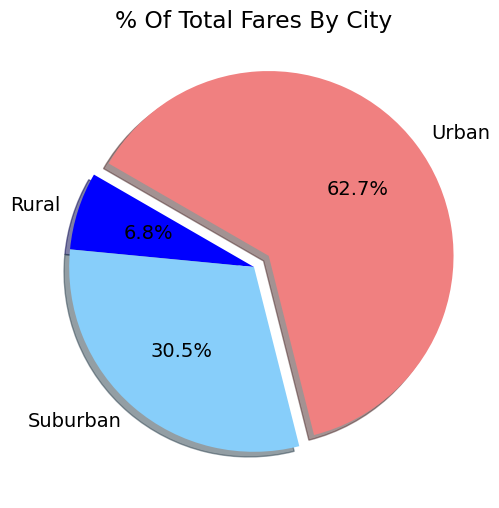

In [76]:
# Creating the Pie chart for percentage of fares

import matplotlib as mpl

figure_name = "Fig 5.png"

plt.subplots(figsize = (10,6))
plt.pie(type_pecents, labels = ["Rural", "Suburban", "Urban"], colors = ["blue", "lightskyblue", "lightcoral"],
       explode = [0,0,0.1], shadow = True, startangle = 150, autopct = "%1.1f%%")

# Changing the font size
mpl.rcParams['font.size'] = 14

plt.title("% Of Total Fares By City")
plt.savefig(os.path.join("Analysis",figure_name), bbox_inches = "tight")
plt.show()

In [77]:
# Calculating Ride percentages

sum_rides_by_types = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_types

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [78]:
total_rides = sum_rides_by_types.sum()
total_rides

2375

In [80]:
type_percents = 100 * sum_rides_by_types/total_rides
type_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

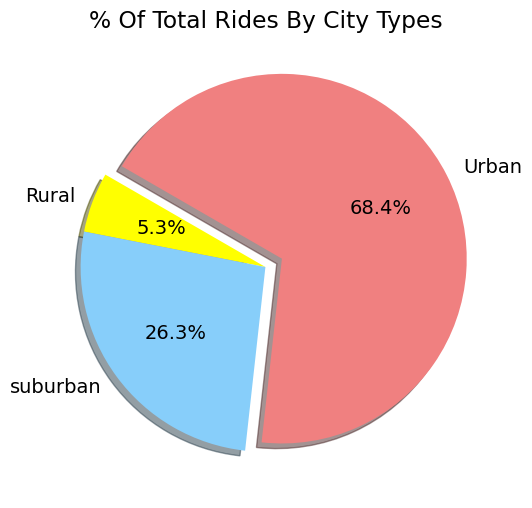

In [88]:
# plotting the total rides by city type Pie chart

figure_name = "Fig 6.png"

plt.subplots(figsize = (10,6))
plt.pie(type_percents, labels = ["Rural", "suburban", "Urban"], shadow = True, startangle = 150,
       autopct = "%1.1f%%", colors = ["yellow", "lightskyblue", "lightcoral"], explode = [0,0,.1])
plt.title("% Of Total Rides By City Types")
mpl.rcParams["font.size"] = 14
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")
plt.show()

In [106]:
# calculating drivers percentages

sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers = sum_drivers_by_type.sum()

type_percents = sum_drivers_by_type / total_drivers * 100

type_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

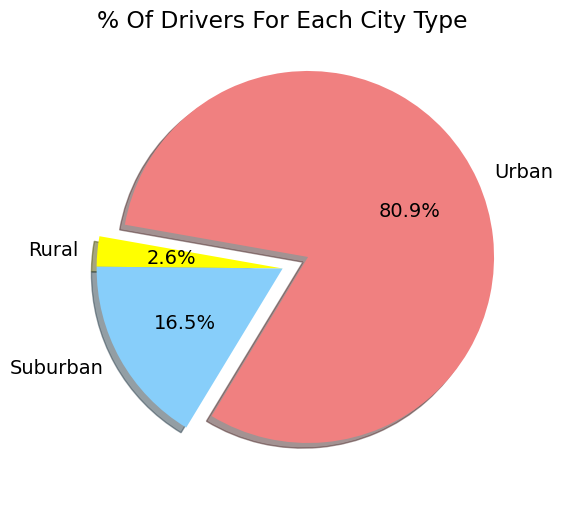

In [109]:
# plotting the % of drivers for each city type Pie chart

figure_name = "Fig 7.png"

plt.subplots(figsize = (6,10))
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"], colors = ["yellow", "lightskyblue", "lightcoral"],
       autopct = "%1.1f%%", startangle = 170, shadow = True, explode = [0,0,0.15])
plt.title("% Of Drivers For Each City Type")
mpl.rcParams["font.size"] = 14
plt.savefig(os.path.join("Analysis", figure_name), bbox_inches = "tight")
plt.show()